In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# simplex

In [3]:
def simplex(df, x_path=[], y_path=[], x=0, y=0, k=0, l=0):  
    move = 0
    alternative = False

    x_path = [x]
    y_path = [y]

    n = 0
    while (df.iloc[0][:-1] > 0).any():
        
        max_value_c = df.iloc[0][:-1].idxmax()
        
        min_value = ((df['RHS'][1:] / df[max_value_c][1:])[df['RHS'][1:] >= 0][df[max_value_c][1:] > 0]).min()

        for i in range(1, len(df[max_value_c])):

            # i will be index of row, that max min_value is in there
            if (df.iloc[i]['RHS'] / df[max_value_c][i]) == min_value:
                pivot = df.iloc[i][max_value_c]
                print(pivot)

                df.iloc[i] = df.iloc[i] / pivot

                for j in range(len(df[max_value_c])):
                    if j != i:
                        df.iloc[j] -= df.iloc[i] * df.iloc[j][max_value_c] 
        
                if max_value_c != 'X1' and max_value_c != 'X2':
                    a = df.iloc[i]['RHS']
                    p = i
                    if p == k:
                        x = 0
                        k = 0
                        print(f"X went out from line {k}")
                    if p == l:
                        y = 0
                        l = 0
                        print(f"Y went out from line {l}")
                    
                # update x , y after changing X1, X2
                if max_value_c == 'X1':
                    x = df.iloc[i]['RHS']
                    k = i
                    print(f"X went to the line {k}")
                    
                if max_value_c == 'X2':
                    y = df.iloc[i]['RHS']
                    l = i
                    print(f"Y went to the line {l}")
                                    

        # updating x and y
        if k != 0:
            x = df.iloc[k]['RHS']
        if l != 0:
            y = df.iloc[l]['RHS']

        x_path.append(x)
        y_path.append(y)

        move += 1
        print(f'move {move}:\n{df}\n\n') 


        
        if x_path[-1] == x_path[-2] and y_path[-1] == y_path[-2]:
            n += 1
            
            if n == 10:
                if x_path[-10:] == [x_path[-1]] * 10 and y_path[-10:] == [y_path[-1]] * 10:
                    
                    while (df.iloc[0][:-1] > 0).any():

                        for first in range(len(df.iloc[0])-1):
                            if df.iloc[0][first] > 0:
                                max_value_c = df.columns[first]
                                
                                positive_values = df[max_value_c][df[max_value_c] > 0]
                                min_value = 0                               
                        
                                for i in range(1, len(df[max_value_c])):
                        
                                    # i will be index of row, that max min_value is in there
                                    if df.iloc[i][first] > min_value:
                                        pivot = df.iloc[i][max_value_c]
                                        print(pivot)
                        
                                        df.iloc[i] = df.iloc[i] / pivot
                        
                                        for j in range(len(df[max_value_c])):
                                            if j != i:
                                                df.iloc[j] -= df.iloc[i] * df.iloc[j][max_value_c] 
                                
                                        if max_value_c != 'X1' and max_value_c != 'X2':
                                            a = df.iloc[i]['RHS']
                                            p = i
                                            if p == k:
                                                x = 0
                                                k = 0
                                                print(f"X went out from line {k}")
                                            if p == l:
                                                y = 0
                                                l = 0
                                                print(f"Y went out from line {l}")
                                            
                                        # update x , y after changing X1, X2
                                        if max_value_c == 'X1':
                                            x = df.iloc[i]['RHS']
                                            print(x)
                                            k = i
                                            print(f"X went to the line {k}")
                                            
                                        if max_value_c == 'X2':
                                            y = df.iloc[i]['RHS']
                                            l = i
                                            print(f"Y went to the line {l}")                                         
                        
                        # updating x and y
                        if k != 0:
                            x = df.iloc[k]['RHS']
                        if l != 0:
                            y = df.iloc[l]['RHS']
                
                        x_path.append(x)
                        y_path.append(y)

    
                        move += 1
                        print(f'move {move}:\n{df}\n\n') 
                        
                                        

    print(f'Possible solution: ({x}, {y})') 
    
    return df, x_path, y_path, x, y, k, l

In [4]:
df = pd.read_csv('tabahi.txt')   #data_1_2.txt, tabahi.txt
df

,X1,X2,X3,X4,X5,X6,X7,RHS
0,0.75,-150,0.02,-6,0,0,0,0
1,0.25,-60,-0.04,9,1,0,0,0
2,0.50,-90,-0.02,3,0,1,0,0
3,0.00,0,1.00,0,0,0,1,1


In [5]:
df, x_path, y_path, x, y, k, l = simplex(df)

0.25
X went to the line 1
move 1:
    X1   X2    X3  X4  X5  X6  X7  RHS
0  0.0   30  0.14 -33  -3   0   0    0
1  1.0 -240 -0.16  36   4   0   0    0
2  0.0   30  0.06 -15  -2   1   0    0
3  0.0    0  1.00   0   0   0   1    1


-240.0
Y went to the line 1
move 2:
         X1  X2        X3     X4        X5  X6  X7  RHS
0  0.125000   0  0.120000 -28.50 -2.500000   0   0    0
1 -0.004167   1  0.000667  -0.15 -0.016667   0   0    0
2  0.125000   0  0.040000 -10.50 -1.500000   1   0    0
3  0.000000   0  1.000000   0.00  0.000000   0   1    1


-0.004166666666666667
X went to the line 1
move 3:
    X1   X2    X3    X4   X5  X6  X7  RHS
0  0.0   30  0.14 -33.0 -3.0   0   0    0
1  1.0 -240 -0.16  36.0  4.0   0   0    0
2  0.0   30  0.06 -15.0 -2.0   1   0    0
3  0.0    0  1.00   0.0  0.0   0   1    1


-240.0
Y went to the line 1
move 4:
         X1  X2        X3     X4        X5  X6  X7  RHS
0  0.125000   0  0.120000 -28.50 -2.500000   0   0    0
1 -0.004167   1  0.000667  -0.15 -0.0166

In [6]:
df

,X1,X2,X3,X4,X5,X6,X7,RHS
0,0.0,-15.0,0.0,-10.5,0.0,-1.5,-0.05,-0.05
1,0.0,0.0,1.0,0.0,0.0,0.0,1.00,1.00
2,1.0,-180.0,0.0,6.0,0.0,2.0,0.04,0.04
3,0.0,-15.0,0.0,7.5,1.0,-0.5,0.03,0.03


In [7]:
print("all points:\n")
for i in range(len(x_path)):
    print(f"({x_path[i]}, {y_path[i]})")

all points:

(0, 0)
(0.0, 0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.03999999999999996, 0)


## visualizaion

In [8]:
def display(x_path, y_path):
    plt.figure(figsize=(8, 6))
    plt.plot(x_path, y_path, marker='o', linestyle='-', color='blue', label='Simplex alternetive')
    plt.scatter(x_path[-1], y_path[-1], color='red', label='Optimal Point', zorder=5)
    
    plt.title("Simplex Path to Optimal Solution")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.legend()
    plt.show()

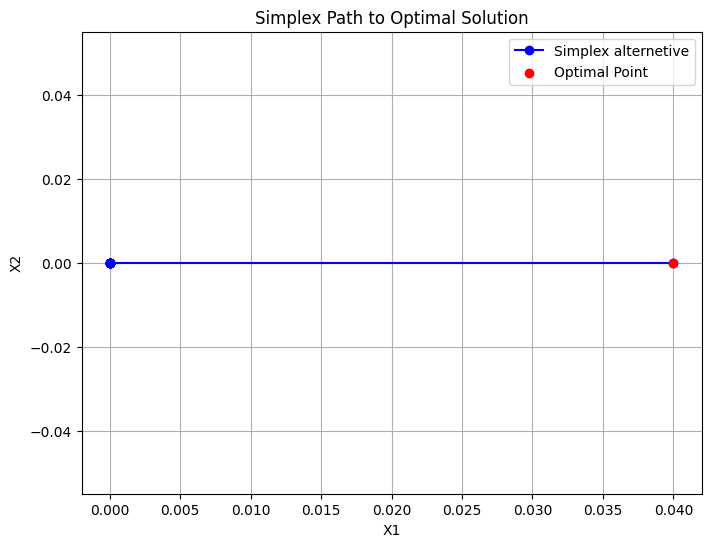

In [9]:
display(x_path, y_path)

# Alternative

In [9]:
def is_alternative(df, x_path, y_path, x, y):
    k = 0
    l = 0
    move = 0
    alternative = False

    if x == 0 or y == 0:
        if x == 0:   
            max_value_c = 'X1'
            
            min_value = ((df['RHS'][1:] / df[max_value_c][1:])[df['RHS'][1:] > 0][df[max_value_c][1:] > 0]).min()
    
            for i in range(1, len(df[max_value_c])):
    
                # i will be index of row, that max min_value is in there
                if (df['RHS'][i] / df[max_value_c][i]) == min_value:
                    pivot = df[max_value_c][i]
    
                    df.iloc[i] = df.iloc[i] / pivot
    
                    for j in range(len(df[max_value_c])):
                        if j != i:
                            df.iloc[j] -= df.iloc[i] * df.iloc[j][max_value_c] 
            
    
                    # update x , y after changing X1, X2
                    if max_value_c == 'X1':
                        x = df.iloc[i]['RHS']
                        k = i
                        print(f"X went to the line {k}")
                    if max_value_c == 'X2':
                        y = df.iloc[i]['RHS']
                        l = i
                        print(f"Y went to the line {l}")
                        
    
            # updating x and y
            if k != 0:
                x = df.iloc[k]['RHS']
            if l != 0:
                y = df.iloc[l]['RHS']
    
            x_path.append(x)
            y_path.append(y)
    
            move += 1
            print(f'move {move}:\n{df}\n\n') 

        if y == 0:
            max_value_c = 'X2'
            
            min_value = ((df['RHS'][1:] / df[max_value_c][1:])[df['RHS'][1:] > 0][df[max_value_c][1:] > 0]).min()
    
            for i in range(1, len(df[max_value_c])):
    
                # i will be index of row, that max min_value is in there
                if (df['RHS'][i] / df[max_value_c][i]) == min_value:
                    pivot = df[max_value_c][i]
    
                    df.iloc[i] = df.iloc[i] / pivot
    
                    for j in range(len(df[max_value_c])):
                        if j != i:
                            df.iloc[j] -= df.iloc[i] * df.iloc[j][max_value_c] 
            
    
                    # update x , y after changing X1, X2
                    if max_value_c == 'X1':
                        x = df.iloc[i]['RHS']
                        k = i
                        print(f"X went to the line {k}")
                    if max_value_c == 'X2':
                        y = df.iloc[i]['RHS']
                        l = i
                        print(f"Y went to the line {l}")
                        
    
            # updating x and y
            if k != 0:
                x = df.iloc[k]['RHS']
            if l != 0:
                y = df.iloc[l]['RHS']
    
            x_path.append(x)
            y_path.append(y)
    
            move += 1
            print(f'move {move}:\n{df}\n\n')  
            
        return df, x_path, y_path

In [10]:
try:
    df2, x_path, y_path = is_alternative(df, x_path, y_path, x, y)
except Exception as e:
    print(f"the optimized model, does'nt have alternative optimize point")

the optimized model, does'nt have alternative optimize point


## Visualization

In [11]:
def alternative_display(df, x_path, y_path):
    plt.figure(figsize=(8, 6))
    
    for i in range(len(x_path) - 2):
        plt.plot(x_path[i:i+2], y_path[i:i+2], marker='o', linestyle='-', color='blue')
    
    plt.plot(x_path[-2:], y_path[-2:], marker='o', linestyle='-', color='red', linewidth=2.5, label='Alternative')
    
    plt.scatter(x_path[-1], y_path[-1], color='red', s=100, zorder=5)
    
    plt.title("Simplex Path to Optimal Solution")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.legend()
    plt.show() 

In [12]:
try:
    alternative_display(df2, x_path, y_path)
except Exception as e:
    print(f"the optimized model, does'nt have alternative optimize point")

the optimized model, does'nt have alternative optimize point


# step by step 

In [10]:
df = pd.read_csv('data_1_1.txt')   #data_1_2.txt, 
df

,X1,X2,X3,X4,X5,RHS
0,1,2,0,0,0,0
1,-2,1,1,0,0,2
2,-1,2,0,1,0,7
3,1,0,0,0,1,3


   X1  X2  X3  X4  X5  RHS
0   5   0  -2   0   0   -4
1  -2   1   1   0   0    2
2   3   0  -2   1   0    3
3   1   0   0   0   1    3


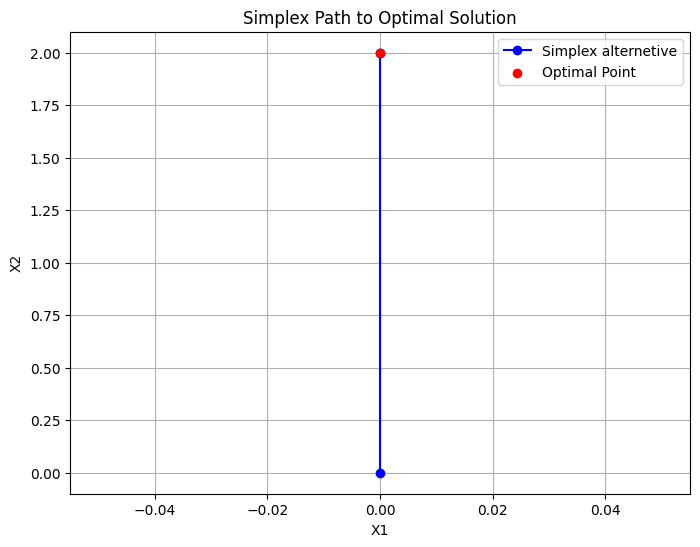

   X1  X2        X3        X4  X5  RHS
0   0   0  1.333333 -1.666667   0   -9
1   0   1 -0.333333  0.666667   0    4
2   1   0 -0.666667  0.333333   0    1
3   0   0  0.666667 -0.333333   1    2


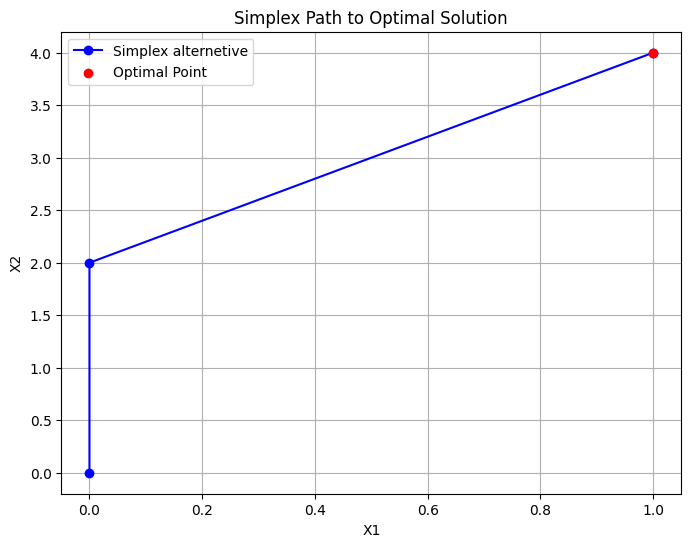

   X1  X2   X3   X4   X5  RHS
0   0   0  0.0 -1.0 -2.0  -13
1   0   1  0.0  0.5  0.5    5
2   1   0  0.0  0.0  1.0    3
3   0   0  1.0 -0.5  1.5    3


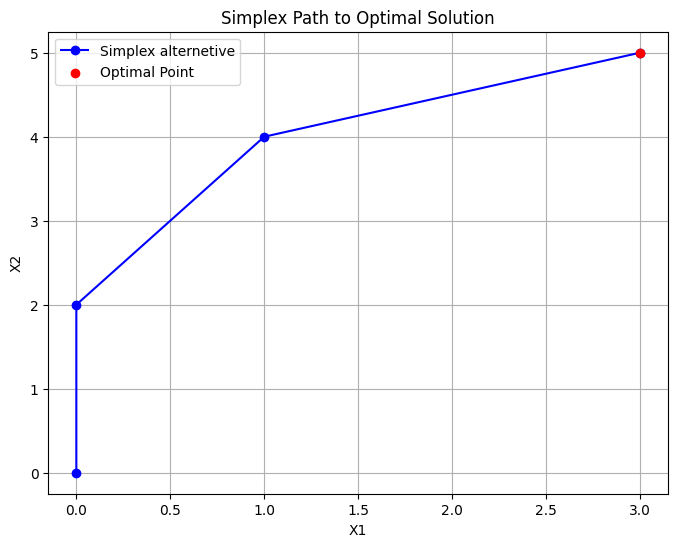

X is in line 2

Y is in line 1



In [11]:
x = 0
y = 0
k = 0
l = 0
alternative = False

x_path = [x]
y_path = [y]

while (df.iloc[0] > 0).any():

    max_value_c = df.iloc[0].idxmax()
    
    min_value = ((df['RHS'][1:] / df[max_value_c][1:])[df['RHS'][1:] > 0][df[max_value_c][1:] > 0]).min()

    for i in range(1, len(df[max_value_c])):

        # i will be index of row, that max min_value is in there
        if (df['RHS'][i] / df[max_value_c][i]) == min_value:
            pivot = df[max_value_c][i]

            df.iloc[i] = df.iloc[i] / pivot

            for j in range(len(df[max_value_c])):
                if j != i:
                    df.iloc[j] -= df.iloc[i] * df.iloc[j][max_value_c] 
    

            # update x , y after changing X1, X2
            if max_value_c == 'X1':
                x = df.iloc[i]['RHS']
                k = i
                
            if max_value_c == 'X2':
                y = df.iloc[i]['RHS']
                l = i
                

    # updating x and y
    if k != 0:
        x = df.iloc[k]['RHS']
    if l != 0:
        y = df.iloc[l]['RHS']

    print(df)
    
    x_path.append(x)
    y_path.append(y)

    plt.figure(figsize=(8, 6))
    plt.plot(x_path, y_path, marker='o', linestyle='-', color='blue', label='Simplex alternetive')
    plt.scatter(x_path[-1], y_path[-1], color='red', label='Optimal Point', zorder=5)
    
    plt.title("Simplex Path to Optimal Solution")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.legend()
    plt.show()


# alternative optimal solutions       

#checking identity matrix
if x == 0 or y == 0:
    alternative = True
    if x == 0:
        max_value_c = 'X1'
        
        min_value = ((df['RHS'][1:] / df[max_value_c][1:])[df['RHS'][1:] > 0][df[max_value_c][1:] > 0]).min()

        for i in range(1, len(df[max_value_c])):

            # i will be index of row, that max min_value is in there
            if (df['RHS'][i] / df[max_value_c][i]) == min_value:
                maxV = df[max_value_c][i]

                df.iloc[i] = df.iloc[i] / maxV

                for j in range(len(df[max_value_c])):
                    if j != i:
                        df.iloc[j] -= df.iloc[i] * df.iloc[j][max_value_c] 
        

                # update x , y after changing X1, X2
                if max_value_c == 'X1':
                    x = df.iloc[i]['RHS']
                    k = i
                if max_value_c == 'X2':
                    y = df.iloc[i]['RHS']
                    l = i
                    

        # updating x and y
        if k != 0:
            x = df.iloc[k]['RHS']
        if l != 0:
            y = df.iloc[l]['RHS']
            

        x_path.append(x)
        y_path.append(y)


                
    if y == 0:
        max_value_c = 'X2'
        
        min_value = ((df['RHS'][1:] / df[max_value_c][1:])[df['RHS'][1:] > 0][df[max_value_c][1:] > 0]).min()

        for i in range(1, len(df[max_value_c])):

            # i will be index of row, that max min_value is in there
            if (df['RHS'][i] / df[max_value_c][i]) == min_value:
                maxV = df[max_value_c][i]

                df.iloc[i] = df.iloc[i] / maxV

                for j in range(len(df[max_value_c])):
                    if j != i:
                        df.iloc[j] -= df.iloc[i] * df.iloc[j][max_value_c] 
        

                # update x , y after changing X1, X2
                if max_value_c == 'X1':
                    x = df.iloc[i]['RHS']
                    k = i
                if max_value_c == 'X2':
                    y = df.iloc[i]['RHS']
                    l = i
                    

        # updating x and y
        if k != 0:
            x = df.iloc[k]['RHS']
        if l != 0:
            y = df.iloc[l]['RHS']

        x_path.append(x)
        y_path.append(y)


    if alternative:  
        print(df)
        plt.figure(figsize=(8, 6))
        
        for i in range(len(x_path) - 2):
            plt.plot(x_path[i:i+2], y_path[i:i+2], marker='o', linestyle='-', color='blue')
        
        plt.plot(x_path[-2:], y_path[-2:], marker='o', linestyle='-', color='red', linewidth=2.5, label='Alternative')
        
        plt.scatter(x_path[-1], y_path[-1], color='red', s=100, zorder=5)
        
        plt.title("Simplex Path to Optimal Solution")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.grid(True)
        plt.legend()
        plt.show()
    
if l != 0 or k != 0:
    if x != 0:
        print(f"X is in line {k}\n")
    else:
        print(f"X is not came out !!!\n")

    if y != 0:
        print(f"Y is in line {l}\n")
    else:
        print(f"Y is not came out !!!\n")

# twoPhase

In [14]:
def phase_1(df):
    # df2 = df
    n = 0    # number of artificial variables 
    for i in range(len(df.iloc[0])-2, -1, -1):
        if df.iloc[0][i] != 0:
            n += 1


    for i in range(len(df.iloc[0])-n-1, len(df.iloc[0])-1):
        while df.iloc[0][i] != 0:
            for j in range(1, len(df['RHS'])):
                if df.iloc[0][i] + df.iloc[j][i] == 0 and df.iloc[j][i] != 0:
                    df.iloc[0] += df.iloc[j]
                    print(f'{df}\n')

    # df.iloc[0] = df2.iloc[0]

    df, x_path, y_path, x, y, k, l = simplex(df)

        
    return df, x_path, y_path, x, y, k, l, n

In [15]:
df = pd.read_csv('twoPhase_3.txt') #twoPhase_2.txt, twoPhase_3.txt 
df

,X1,X2,X3,X4,RHS
0,0,0,-1,-1,0
1,1,1,1,0,2
2,2,2,0,1,4


In [16]:
df, x_path, y_path, x, y, k, l, n = phase_1(df)

   X1  X2  X3  X4  RHS
0   1   1   0  -1    2
1   1   1   1   0    2
2   2   2   0   1    4

   X1  X2  X3  X4  RHS
0   3   3   0   0    6
1   1   1   1   0    2
2   2   2   0   1    4

1
X went to the line 1
move 1:
   X1  X2  X3  X4  RHS
0   0   0  -3   0    0
1   1   1   1   0    2
2   0   0  -2   1    0


Possible solution: (2, 0)


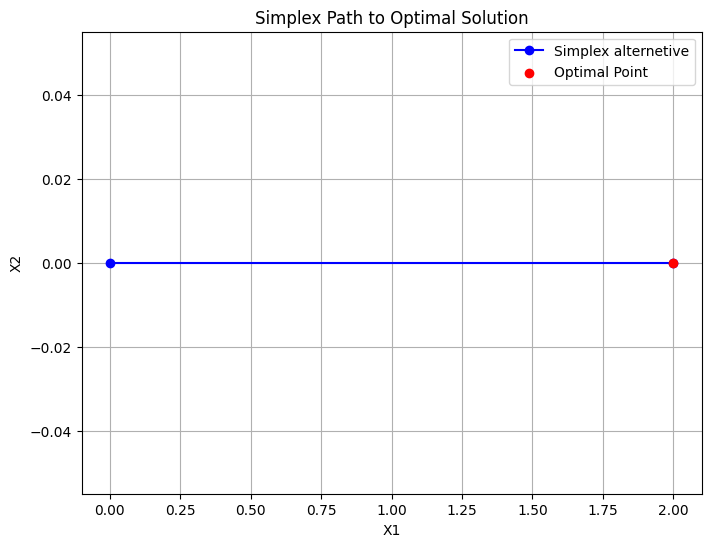

In [17]:
display(x_path, y_path)

In [18]:
def phase_2(df, df2, x_path, y_path, x, y, k, l, n):
    for _ in range(n):
        df = df.drop(df.columns[-2], axis=1)
    df.iloc[0] = df2.iloc[0]
    print(f'after remove artifical variables:\n{df}\n')

    m = 0
    for i in range(len(df.iloc[0])):
        if df.iloc[0][i] != 0:
            m += 1

    z = 0
    df2 = df
    for i in range(m):
        if df.iloc[0][i] != 0:
            
            for j in range(1, len(df['RHS'])):
                if z == j:
                    if j+1 != len(df['RHS']):
                        j += 1
                    else:
                        break
                        
                if df.iloc[0][i] - df.iloc[j][i]/df.iloc[j][i]*df.iloc[0][i] == 0 and df.iloc[j][i] != 0:
                    df.iloc[j] = df.iloc[j] / df.iloc[j][i]
                    df.iloc[0] -= df.iloc[j]*df.iloc[0][i]
                    z = j
                    
            print(df)


    df, x_path, y_path, x, y, k, l = simplex(df, x_path, y_path, x, y, k, l)   

    return df, df2, x_path, y_path, x, y, k, l, n

In [19]:
df2 = pd.read_csv('twoPhase_model_3.txt') #twoPhase_model_2.txt, twoPhase_model_3.txt
df2

,X1,X2,RHS
0,-1,-2,0


In [20]:
df, df2, x_path, y_path, x, y, k, l, n = phase_2(df, df2, x_path, y_path, x, y, k, l, n)

after remove artifical variables:
   X1  X2  RHS
0  -1  -2    0
1   1   1    2
2   0   0    0

   X1  X2  RHS
0   0  -1    2
1   1   1    2
2   0   0    0
   X1  X2  RHS
0   0  -1    2
1   1   1    2
2   0   0    0
Possible solution: (2, 0)


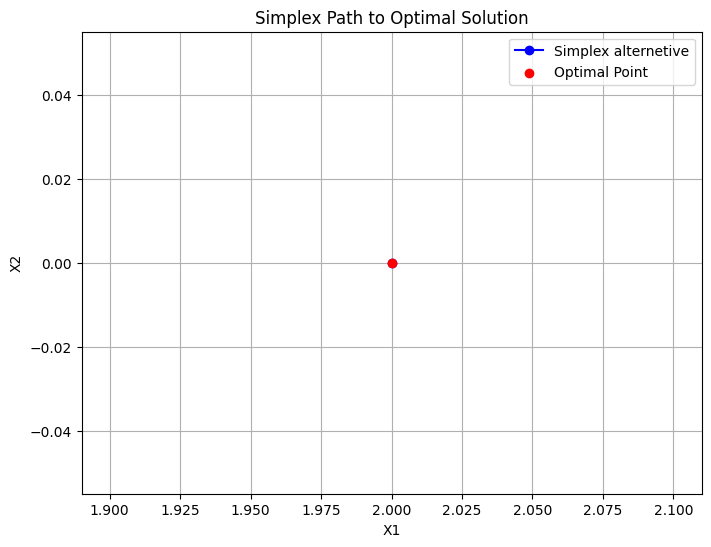

In [21]:
display(x_path, y_path)